# Gravitational Orbits Final Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [3]:
class Orbit:
    """
    This class uses initial coniditions and Lagrange's equations for two bodies orbiting with gravity
    
    Parameters
    ----------
    m_1 : float
    m_2 : float
    G : float
    
    Methods
    -------
    dz_dt(t,z)
        Returns the right side of the diff eq in vector z
    """
    
    def __init__(self, m_1=1., m_2=1., G=1.):
        self.m_1 = m_1
        self.m_2 = m_2
        self.G = G
        
    def dz_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        [dz/dt d^2z/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        z : float
            8-component vector with y[0] = x_1(t) & y[1] = x_dot_1(t) 
                                    y[2] = y_1(t) & y[3] = y_dot_1(t)
                                    y[4] = x_2(t) & y[5] = x_dot_2(t)
                                    y[6] = y_2(t) & y[7] = y_dot_2(t)
        
        Returns
        -------
        """
        r_12 = np.sqrt((z[0] - z[4])**2 + (z[2] - z[6])**2)
        
        return [z[1], self.G * self.m_2 * (z[4] - z[0]) / r_12**3, \
                z[3], self.G * self.m_2 * (z[6] - z[2]) / r_12**3, \
                z[5], -self.G * self.m_1 * (z[4] - z[0]) / r_12**3, \
                z[7], -self.G * self.m_1 * (z[6] - z[2]) / r_12**3, \
               ]
    
    def solve_ode(self, t_pts, z_0, abserr=1.0e-8, relerr=1.0e-8):
        
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """  
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                             z_0, t_eval=t_pts, method='RK23', 
                             atol=abserr, rtol=relerr)
        x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = solution.y
                
        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2
    
#     def solve_ode_Leapfrog(self, t_pts, z_0):
#         """Solve ode with leapfrog method"""
#         delta_t = t_pts[1] - t_pts[0]
        
#         x_1_0, d_dot_1_0, y_1_0, y_dot_1_0, \
#                 x_2_0, x_dot_2_0, y_2_0, y_dot_2_0 = z_0
                
        
#         return (self.mu/2.) * r_dot**2 + self.Ueff(r)

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

# Orbit plots

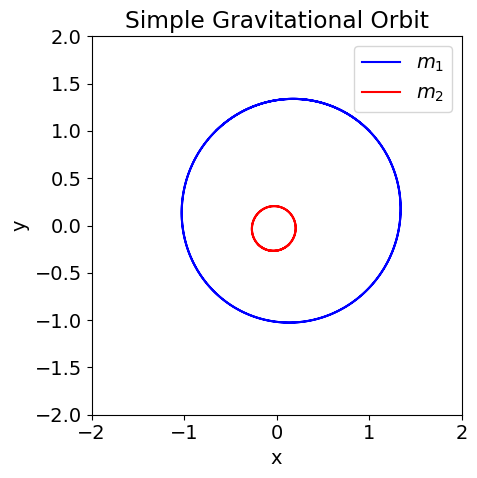

In [6]:
# Plotting time 
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t) 

G = 1.
m_1 = 1.
m_2 = 5.

#instantiate orbits
o1 = Orbit(m_1, m_2, G)

#initial conditions
# x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, x_2_0, x_dot_2_0, y_2_0, y_dot_2_0
x_1_0, x_dot_1_0 = 1., -1.
y_1_0, y_dot_1_0 = 1., 1.
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = o1.solve_ode(t_pts, z_0)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x_1, y_1, color='blue', label=r'$m_1$')
ax.plot(x_2, y_2, color='red', label=r'$m_2$')
ax.set_title('Simple Gravitational Orbit')
ax.set_xlim(-2., 2.)
ax.set_ylim(-2., 2.)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

fig.tight_layout()
fig.savefig('Gravational_Orbit_Final.png')

## Orbit (time dependence)

We'll directly solve the equations for r(t) and phi(t).

In [7]:
# Plotting time 
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Initial conditions
r_0 = 1.
r_dot_0 = 0.
phi_0 = 0.0
r_pts, r_dot_pts, phi_pts = o1.solve_ode(t_pts, r_0, r_dot_0, phi_0)

c = o1.ang_mom**2 / (np.abs(o1.k) * o1.mu)
epsilon = c / r_0 - 1.
energy_0 = o1.mu/2. * r_dot_0**2 + o1.Ueff(r_0)
print(f'energy = {energy_0:.2f}')
print(f'eccentricity = {epsilon:.2f}')

ValueError: `y0` must be 1-dimensional.

In [ ]:
fig_4 = plt.figure(figsize=(8,8))

overall_title = 'Gravitational orbit:  ' + \
                rf' $n = {o1.n},$' + \
                rf' $k = {o1.k:.1f},$' + \
                rf' $l = {o1.ang_mom:.1f},$' + \
                rf' $r_0 = {r_0:.1f},$' + \
                rf' $\dot r_0 = {r_dot_0:.2f},$' + \
                rf' $\phi_0 = {phi_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig_4.suptitle(overall_title, va='baseline')

ax_4a = fig_4.add_subplot(2,2,1)
ax_4a.plot(t_pts, r_pts, color='black')
ax_4a.set_xlabel(r'$t$')
ax_4a.set_ylabel(r'$r$')
ax_4a.set_title('Time dependence of radius')

ax_4b = fig_4.add_subplot(2,2,2)
ax_4b.plot(t_pts, phi_pts/(2.*np.pi), color='black')
ax_4b.plot(t_pts, phi_pts/(2.*np.pi)%1, color='red')
ax_4b.set_xlabel(r'$t$')
ax_4b.set_ylabel(r'$\phi/2\pi$')
ax_4b.set_title(r'Time dependence of $\phi$')

ax_4c = fig_4.add_subplot(2,2,3)
ax_4c.plot(r_pts*np.cos(phi_pts), r_pts*np.sin(phi_pts), color='black')
ax_4c.set_xlabel(r'$x$')
ax_4c.set_ylabel(r'$y$')
ax_4c.set_aspect(1)
ax_4c.set_title('Cartesian plot')

ax_4d = fig_4.add_subplot(2,2,4, polar=True)
ax_4d.plot(phi_pts, r_pts, color='black')
ax_4d.set_title('Polar plot', pad=20.)


fig_4.tight_layout()



## Energy versus time

In [ ]:
E_tot_pts = o1.energy(t_pts, r_pts, r_dot_pts)
E_tot_0 = E_tot_pts[0]
E_tot_rel_pts = np.abs((E_tot_pts - E_tot_0)/E_tot_0)

# print(f'    t        E_tot        rel. error')
# for t, E_tot, E_tot_rel in zip(t_pts, E_tot_pts, E_tot_rel_pts):
#     print(f'{t:8.5f}  {E_tot:8.5e}  {E_tot_rel:12.4e}')

In [ ]:
fig_5 = plt.figure(figsize=(6,6))

overall_title = 'Gravitational orbit:  ' + \
                rf' $n = {o1.n},$' + \
                rf' $k = {o1.k:.1f},$' + \
                rf' $l = {o1.ang_mom:.1f},$' + \
                rf' $r_0 = {r_0:.1f},$' + \
                rf' $\dot r_0 = {r_dot_0:.2f},$' + \
                rf' $\phi_0 = {phi_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig_5.suptitle(overall_title, va='baseline')

ax_5a = fig_5.add_subplot(1,1,1)
ax_5a.semilogy(t_pts, np.abs(E_tot_pts), color='black', label=r'$E(t)$')
ax_5a.semilogy(t_pts, E_tot_rel_pts, color='red', label=r'$\Delta E(t)$')
ax_5a.set_xlabel(r'$t$')
ax_5a.set_ylabel(r'Energy')
ax_5a.set_title('Change in energy with time')
ax_5a.legend(loc='lower right')

fig_5.tight_layout()

## Verifying the virial theorem numerically

First a quick calculation with the current orbit:

In [ ]:
t_range = t_pts[-1] - t_pts[0]
U_pts = o1.U(r_pts)
T_pts = o1.energy(t_pts, r_pts, r_dot_pts) - U_pts

In [ ]:
from scipy.integrate import simps

In [ ]:
T_avg = simps(T_pts, t_pts, delta_t) / t_range
U_avg = simps(U_pts, t_pts, delta_t) / t_range
print(f'<T> = {T_avg:.6f}, <U> = {U_avg:.6f}, n<U>/2 = {o1.n*U_avg/2:.6f}')

Now a more complete study with different $n$ values and varying integration times:

In [ ]:
from scipy.integrate import simps

# For simplicity, set the angular momentum to 1 and k to +2 or -2 with n*k > 0 
n_values = (-1, 2, 3, 4, 7)   # different n values to test
t_end_values = (10., 100., 1000.)  # integration max values to test
k_magnitude = 2.

# Time start and spacing
t_start = 0.
delta_t = 0.001

# Initial conditions
r_0 = 1.
r_dot_0 = 0.
phi_0 = 0.0
ang_mom = 1.

print(f' n    t_end     <T>        <U>        n<U>/2     |<T>-n<U>/2|/<T>')
for n in n_values:
    k = np.sign(n) * k_magnitude   # ensure that n*k > 0
    o_now = Orbit(ang_mom, n=n, k=k, mu=1.)  # current orbit 
    for t_end in t_end_values:
        t_pts = np.arange(t_start, t_end+delta_t, delta_t)  
        r_pts, r_dot_pts, phi_pts = o_now.solve_ode(t_pts, r_0, 
                                                    r_dot_0, phi_0)

        t_range = t_pts[-1] - t_pts[0]
        # Generate the integrands to be averaged
        U_pts = o_now.U(r_pts)
        T_pts = o_now.energy(t_pts, r_pts, r_dot_pts) - U_pts
        # Calculate the time averages from 0 to t_end
        T_avg = simps(T_pts, t_pts, delta_t) / t_range
        U_avg = simps(U_pts, t_pts, delta_t) / t_range

        rel_error = np.fabs((T_avg - n*U_avg/2.) / T_avg)
        print(f'{n:2.0f}   {t_end:5.0f}   {T_avg:9.6f}  {U_avg:9.6f} ',
              f' {n*U_avg/2.:9.6f}       {rel_error:9.3e}')